#### Importing the libraries

In [2]:
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt

#### About the dataset

- The dataset used for this experiment is MNIST dataset.
- The MNIST is a classic Machine Learning dataset, which consists of 70,000 grayscale images of handwritten digits from 0 to 9.
- Each of these images has a size of 28*28 pixels
- The dataset is split into training and testing parts. The training set consists of 60,000 images and the testing set consists of 10,000 images
- The dataset has been extensively used for image classification, digit recognition and various deep learning tasks.

#### Loading the dataset

- Loaded the MNIST dataset using Keras, unpacked it into training and testing sets, ignoring the labels.
- Normalized pixel values of images to the range [0, 1] by dividing by 255.
- Flattened each image from a 28x28 matrix to a 1D vector of size 784.
- Printed the shapes of the training and testing data to verify the transformation.

In [3]:
# Loading the dataset from keras and then dividing into train and teset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


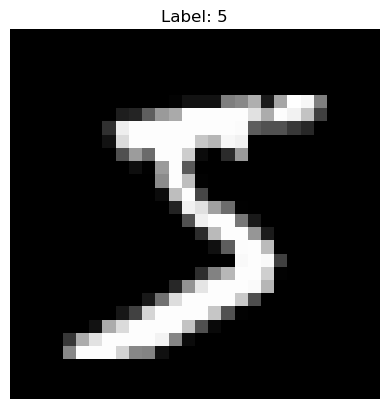

In [4]:
# visualising an image from the dataset
index = 0
plt.imshow(x_train[index], cmap='gray')
plt.title(f"Label: {y_train[index]}")
plt.axis('off')  
plt.show()

In [5]:
# Printing the shape of the image
x_train[index].shape

(28, 28)

In [6]:
# Printing the label of the image
print("Label:", y_train[index])

Label: 5


#### Autoencoder architecture

- The auto-encoder architecture consists of the following:
    - Encoder
    - Decoder
- The encoder reduces input data to a lower-dimensional representation, while the decoder reconstructs the original data from this representation. 
- During training, it minimizes the reconstruction error between input and 

- This code implements a basic autoencoder using Keras, consisting of an encoder and decoder neural network. The encoder compresses input data into a lower-dimensional representation, while the decoder reconstructs the original input from this compressed representation. The encoding dimension is set to 32, aiming for a compression factor of 24.5. The autoencoder is trained to minimize binary crossentropy loss using the Adadelta optimizer.

In [4]:
# Set the size of the encoded representations
encoding_dim = 32  # 32 floats -> compression factor of 24.5, assuming the input is 784 floats

# Define input placeholder for the autoencoder
input_img = Input(shape=(784,))  

# Encoder: Map input to encoded representation
encoded = Dense(encoding_dim, activation='relu')(input_img)  

# Decoder: Reconstruct input from encoded representation
decoded = Dense(784, activation='sigmoid')(encoded)  

# Autoencoder model: Maps input to its reconstruction
autoencoder = Model(input_img, decoded)  

# Encoder model: Maps input to its encoded representation
encoder = Model(input_img, encoded)  

# Placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))  

# Retrieve the last layer of the autoencoder model (decoder)
decoder_layer = autoencoder.layers[-1]  

# Decoder model: Maps encoded input to its reconstruction
decoder = Model(encoded_input, decoder_layer(encoded_input))  

# Configure the autoencoder model with binary crossentropy loss and Adadelta optimizer
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

- This code loads the MNIST dataset, consisting of handwritten digit images, into training and testing sets. It normalizes pixel values to a range between 0 and 1 and flattens each image from a 28x28 matrix into a 1D vector. Finally, it prints the shapes of the training and testing data to confirm the transformation.

In [13]:
# Load the MNIST dataset, unpacking it into training and testing sets, while ignoring the labels (represented by '_')
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize pixel values of images to the range [0, 1] by dividing by 255,
# as pixel values range from 0 to 255 (grayscale images).
x_train = x_train.astype('float32') / 255.  # Convert to float32 and normalize training set
x_test = x_test.astype('float32') / 255.    # Convert to float32 and normalize test set

# Flatten each image in the dataset from a 28x28 matrix to a 1D vector of size 784.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))  # Reshape training set
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))       # Reshape test set

# Print the shapes of the training and testing data to verify the transformations.
print(x_train.shape)  # Print shape of the training data
print(x_test.shape)   # Print shape of the testing data

(60000, 784)
(10000, 784)


#### Training the Autoencoder

- This code trains an autoencoder model using the training data (x_train) as both input and target output. The autoencoder is trained to reconstruct the input data, with training performed over 50 epochs and a batch size of 256 samples. Data shuffling is applied during training to introduce randomness and prevent overfitting. Validation data (x_test) is provided to monitor the model's performance on unseen data. After training, the code encodes and decodes some digits from the test set using the trained encoder and decoder models, producing reconstructed images (decoded_imgs) from the encoded representations (encoded_imgs).

In [7]:
# Train the autoencoder model using the training data (x_train) as both input and target output.
# The autoencoder aims to reconstruct the input data, hence `x_train` is passed as both input and target.
# Training is performed over 50 epochs with a batch size of 256 samples.
# Data is shuffled during training to introduce randomness and avoid overfitting.
# Validation data is provided to monitor the performance of the model on unseen data during training.
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits from the test set using the trained encoder and decoder models.
# The encoded representation of the test set is obtained by passing it through the encoder.
encoded_imgs = encoder.predict(x_test)
# The encoded representations are then decoded back into the original data space using the decoder.
decoded_imgs = decoder.predict(encoded_imgs)

Epoch 1/50
235/235 [==============================] - 3s 11ms/step - loss: 0.6946 - val_loss: 0.6945
Epoch 2/50
235/235 [==============================] - 2s 10ms/step - loss: 0.6943 - val_loss: 0.6943
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.6942 - val_loss: 0.6941
Epoch 4/50
235/235 [==============================] - 3s 14ms/step - loss: 0.6940 - val_loss: 0.6939
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.6938 - val_loss: 0.6937
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.6936 - val_loss: 0.6935
Epoch 7/50
235/235 [==============================] - 2s 10ms/step - loss: 0.6934 - val_loss: 0.6933
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 9/50
235/235 [==============================] - 3s 14ms/step - loss: 0.6930 - val_loss: 0.6929
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.6928 - val_lo

- This code visualizes original and reconstructed images from the MNIST test set. It creates a figure with 20 subplots arranged in 2 rows and 10 columns. In the first row, it displays the first 20 original images, while in the second row, it displays their corresponding reconstructed images. Both original and reconstructed images are grayscale and have their axes hidden. Finally, it shows the plot containing the visualized images.

#### Visualising Original Image and the Reconstructed image

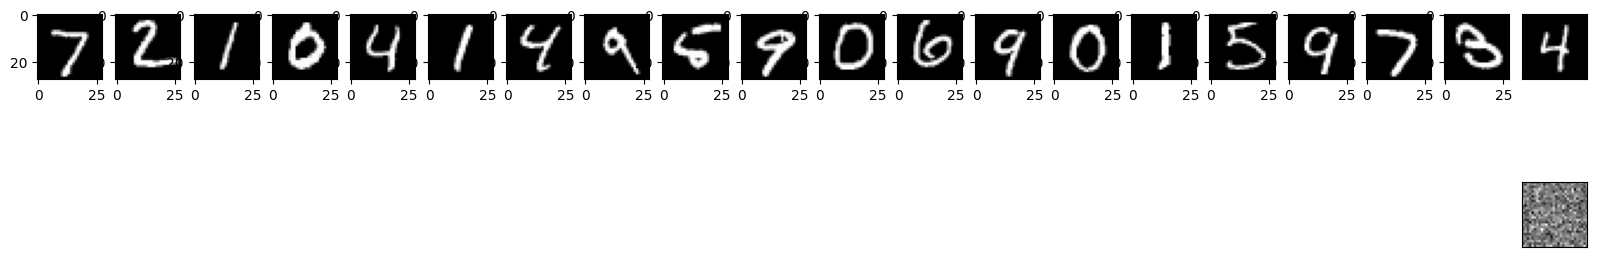

In [10]:
n = 20  # Number of digits to display

# Create a figure with 20 subplots arranged in 2 rows and 'n' columns
plt.figure(figsize=(20, 4))

# Loop through the first 'n' digits in the test set
for i in range(n):
    # Display original images in the first row of subplots
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))  # Reshape the image from 1D to 2D
    plt.gray()  # Set colormap to grayscale
    ax.get_xaxis().set_visible(False)  # Hide x-axis
    ax.get_yaxis().set_visible(False)  # Hide y-axis

# Loop through the same 'n' digits to display their reconstructions in the second row of subplots
for i in range(n):
    # Display reconstructed images in the second row of subplots
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))  # Reshape the reconstructed image from 1D to 2D
    plt.gray()  # Set colormap to grayscale
    ax.get_xaxis().set_visible(False)  # Hide x-axis
    ax.get_yaxis().set_visible(False)  # Hide y-axis

# Show the plot containing original and reconstructed images
plt.show()

#### Experiment Conclusion:

- Dataset: Used the MNIST dataset containing 70,000 grayscale images of handwritten digits (0 to 9), with each image being 28x28 pixels.
- Data Preparation: Normalized pixel values of images to the range [0, 1], flattened each image into a 1D vector of size 784, and split the dataset into training (60,000 images) and testing (10,000 images) sets.
- Autoencoder Architecture: Implemented a basic autoencoder architecture using Keras, consisting of an encoder and decoder neural network. The encoding dimension was set to 32, aiming for a compression factor of 24.5.
- Training: Trained the autoencoder model using the training data as both input and target output over 50 epochs with a batch size of 256 samples. Shuffled the data during training and provided validation data to monitor the model's performance.
- Visualization: Visualized original and reconstructed images from the MNIST test set by creating a figure with 20 subplots arranged in 2 rows and 10 columns. Displayed the first 20 original images and their corresponding reconstructed images.

#### Observations

- The autoencoder successfully learned to reconstruct handwritten digits from the MNIST dataset.
- The reconstructed images closely resemble the original images, indicating the effectiveness of the autoencoder in capturing essential features of the input data.

#### Conclusion

- The experiment demonstrates the capability of autoencoders in learning efficient representations of data and reconstructing it with minimal loss.
- Autoencoders have various applications, including data compression, denoising, and feature learning, and can be further explored for more complex tasks in the future.